In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # métricas
from sklearn.metrics import classification_report # métricas de avaliação do modelo
from sklearn.tree import DecisionTreeClassifier #escolhe o modelo
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

In [24]:
df_nova = pd.read_excel('/content/WA_Fn-UseC_-Telco-Customer-Churn_with_dummy.xlsx')

df_nova

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,3101-PFNPF,Male,0,No,No,44,No,No phone service,No,Yes,No,Yes,No internet service,No,No,One year,Yes,Bank transfer (automatic),24.21,1034.04
1,1597-ABHPK,Male,1,No,No,56,Yes,No,Fiber optic,No,Yes,No internet service,Yes,No,No,One year,Yes,Bank transfer (automatic),61.53,3390.13
2,1976-KPOJJ,Male,0,Yes,No,55,Yes,Yes,DSL,No,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),75.22,3995.69
3,9047-HDAFB,Male,0,Yes,No,10,No,Yes,DSL,No internet service,No,No internet service,Yes,No internet service,Yes,Month-to-month,No,Electronic check,68.19,687.97
4,9886-GGDPW,Male,1,No,Yes,57,No,No phone service,No,No internet service,Yes,Yes,No internet service,Yes,Yes,Two year,No,Mailed check,87.16,5097.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,6914-UOLFU,Female,0,Yes,No,71,No,No phone service,DSL,Yes,No internet service,No,Yes,No internet service,No,One year,No,Credit card (automatic),100.20,7181.60
96,8478-TKSBS,Male,0,No,Yes,69,No,Yes,DSL,No internet service,No,No internet service,No internet service,Yes,No,Two year,No,Electronic check,112.50,7706.55
97,2482-NNRJP,Male,0,Yes,No,19,Yes,No phone service,Fiber optic,Yes,Yes,No internet service,Yes,No,Yes,One year,Yes,Credit card (automatic),59.80,1163.64
98,1241-BGIAH,Male,1,No,No,31,Yes,No phone service,Fiber optic,No,No,No internet service,Yes,No,No,One year,Yes,Electronic check,20.70,611.73


In [2]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [5]:
# 'Total charges' was read as str

# Converting 'Total charges' to float
df.loc[df['TotalCharges'] == " ", 'TotalCharges'] = 0
df = df.astype({'TotalCharges':float})

# Converting 'SeniorCitizen' to str
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1, 'Yes')
df['SeniorCitizen'] = df['SeniorCitizen'].replace(0, 'No')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


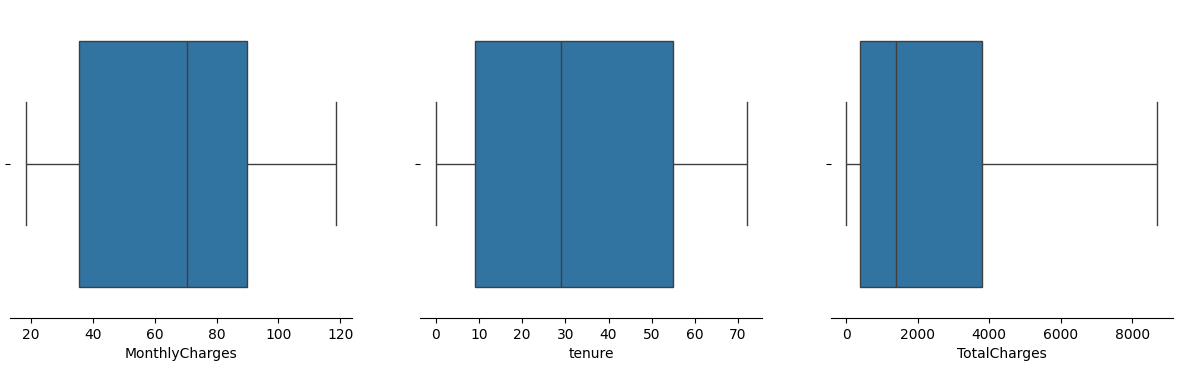

In [6]:
# Boxplots of monthly charges, tenure and total charges

fig, ax = plt.subplots(1,3, figsize=(15,4))
sns.boxplot(ax=ax[0], data=df, x='MonthlyCharges')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['left'].set_visible(False)
sns.boxplot(ax=ax[1], data=df, x='tenure')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['left'].set_visible(False)
sns.boxplot(ax=ax[2], data=df, x='TotalCharges')
ax[2].spines['top'].set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['left'].set_visible(False)

In [7]:
Q1 = df['TotalCharges'].quantile(.25)

Q3 = df['TotalCharges'].quantile(.75)

IIQ = Q3 - Q1

L_inf = Q1 - 1.5*IIQ

L_sup = Q3 + 1.5*IIQ

df.drop(df[df['TotalCharges'] > L_sup].index, inplace=True)

L_sup



np.float64(8868.675)

<Axes: xlabel='SeniorCitizen'>

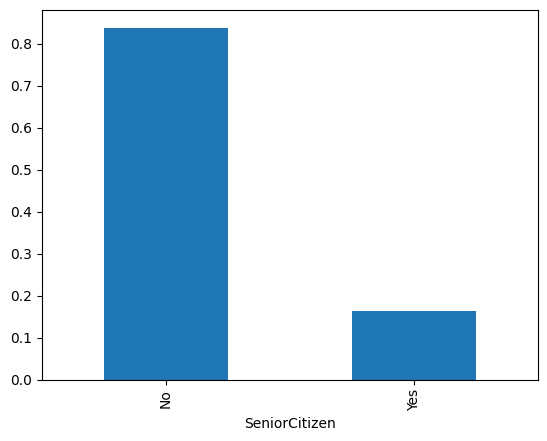

In [8]:
df['SeniorCitizen'].value_counts()

df['SeniorCitizen'].value_counts(normalize=True).plot(kind='bar')


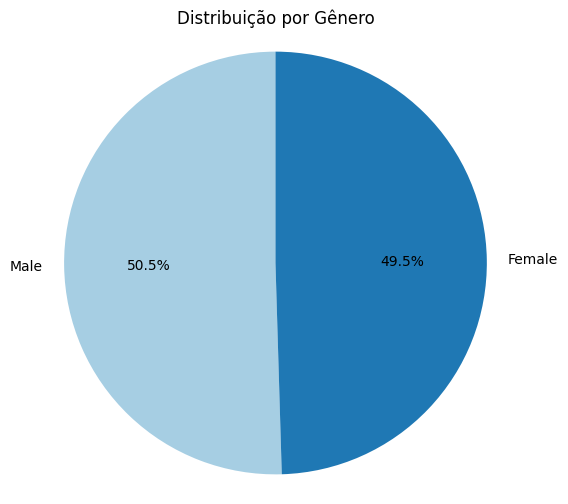

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


gender_counts = df['gender'].value_counts()

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Paired.colors
)

plt.title('Distribuição por Gênero')
plt.axis('equal')  # Deixa o gráfico circular
plt.show()

<Axes: >

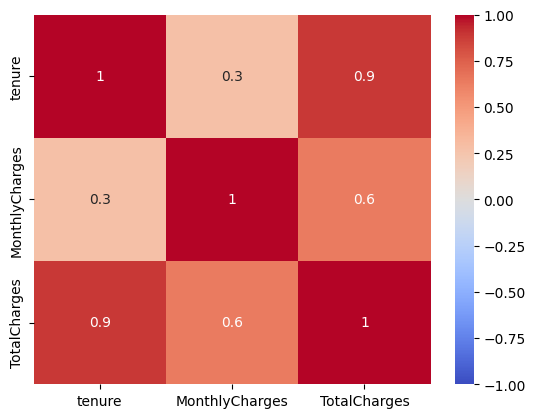

In [10]:
import seaborn as sns


sns.heatmap(

            df.corr(numeric_only=True,method='spearman'), #method trocou para Spearman e o padrão é Pearson
            annot = True, #rótulo
            vmax = 1, #trava a escala máx das cores em 1
            vmin = -1, #trava a escala mín das cores em -1
            cmap='coolwarm', #muda a escala das cores
            fmt='.1g'#para aumentar o número de casas decimais

            )

In [11]:
colunas = df.columns.tolist()
print(colunas)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [12]:
new_cols_categoric = df.columns.difference(['tenure', 'MonthlyCharges', 'Churn', 'customerID', 'TotalCharges']).values

princ_rel_churn_array = []
rel_churn_array = []

for f in new_cols_categoric:
    fator = f
    sumar1 = pd.crosstab(df[fator], df.Churn, normalize=True)*100
    sumar1 = sumar1[['Yes', 'No']]
    sumar1[(sumar1.index != 0)]
    largest_correlation = sumar1.loc[sumar1['Yes'] == sumar1['Yes'].max()]
    princ_rel_churn_array.append(largest_correlation.index[0])
    rel_churn_array.append(largest_correlation['Yes'].iloc[0])

df_result = pd.DataFrame({"Factor" : new_cols_categoric, "Main Atribute" : princ_rel_churn_array, "Correlation" : rel_churn_array})
df_result = df_result.set_index('Factor')
df_result.sort_values('Correlation', ascending=False)
df_result['Factor_Atribute'] = df_result.index + " - " + df_result['Main Atribute']
df_result



,Main Atribute,Correlation,Factor_Atribute
Factor,,,
Contract,Month-to-month,23.498509,Contract - Month-to-month
Dependents,No,21.908278,Dependents - No
DeviceProtection,No,17.194377,DeviceProtection - No
InternetService,Fiber optic,18.415448,InternetService - Fiber optic
MultipleLines,Yes,12.068721,MultipleLines - Yes
OnlineBackup,No,17.506744,OnlineBackup - No
OnlineSecurity,No,20.744001,OnlineSecurity - No
PaperlessBilling,Yes,19.877893,PaperlessBilling - Yes
Partner,No,17.038194,Partner - No


In [13]:
### Applying qui-2 to determine statistical correlation between categorial values and churn

from scipy.stats import chi2_contingency

factors = new_cols_categoric
alpha_values = []
stat_values = []
GL_values = []
p_value = []
result_qui2 = []

for fator in factors:
    sumar1 = pd.crosstab(df[fator], df.Churn)
    df_qui2 = []

    for i in sumar1.index.tolist():
        ### Defining table
        df_qui2.extend(sumar1.loc[sumar1.index == i].values.tolist())

    stat, p, dof, expected = chi2_contingency(df_qui2)

    # interpret p-value
    alpha = 0.001
    stat_values.append(stat)
    GL_values.append(dof)
    p_value.append(p)
    alpha_values.append(alpha)

    if p <= alpha:
        result_qui2.append('Dependent (reject H0)')
    else:
        result_qui2.append('Independent (H0 holds true)')

df_result_qui2 = pd.DataFrame({'factors' : factors, 'stat' : stat_values, 'DF_value' : GL_values, 'p_value' : p_value, 'result' : result_qui2})
df_result_qui2.sort_values('p_value').reset_index(drop=True)



,factors,stat,DF_value,p_value,result
0,Contract,1184.596572,2,5.863038e-258,Dependent (reject H0)
1,OnlineSecurity,849.998968,2,2.661150e-185,Dependent (reject H0)
2,TechSupport,828.197068,2,1.443084e-180,Dependent (reject H0)
3,InternetService,732.309590,2,9.571788e-160,Dependent (reject H0)
4,PaymentMethod,648.142327,3,3.682355e-140,Dependent (reject H0)
5,OnlineBackup,601.812790,2,2.079759e-131,Dependent (reject H0)
6,DeviceProtection,558.419369,2,5.505219e-122,Dependent (reject H0)
7,StreamingMovies,375.661479,2,2.667757e-82,Dependent (reject H0)
8,StreamingTV,374.203943,2,5.528994e-82,Dependent (reject H0)
9,PaperlessBilling,258.277649,1,4.073355e-58,Dependent (reject H0)


In [14]:
df = df.drop(columns=['MultipleLines','PhoneService','gender','customerID'])

df

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,24,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,No,Yes,Yes,72,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,No,Yes,Yes,11,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Yes,Yes,No,4,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [15]:
df_dummy = pd.get_dummies(df)

df_dummy = df_dummy.drop(columns=['Churn_Yes','Churn_No'])

df_Churn = df['Churn'].replace({'Yes': 1, 'No': 0})

df_Churn

df_joined = pd.concat([df_dummy, df_Churn], axis=1)

df_joined

/tmp/ipython-input-3760860971.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Churn = df['Churn'].replace({'Yes': 1, 'No': 0})


,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,InternetService_DSL,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,1,29.85,29.85,True,False,False,True,True,False,True,...,True,False,False,False,True,False,False,True,False,0
1,34,56.95,1889.50,True,False,True,False,True,False,True,...,False,True,False,True,False,False,False,False,True,0
2,2,53.85,108.15,True,False,True,False,True,False,True,...,True,False,False,False,True,False,False,False,True,1
3,45,42.30,1840.75,True,False,True,False,True,False,True,...,False,True,False,True,False,True,False,False,False,0
4,2,70.70,151.65,True,False,True,False,True,False,False,...,True,False,False,False,True,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,True,False,False,True,False,True,True,...,False,True,False,False,True,False,False,False,True,0
7039,72,103.20,7362.90,True,False,False,True,False,True,False,...,False,True,False,False,True,False,True,False,False,0
7040,11,29.60,346.45,True,False,False,True,False,True,True,...,True,False,False,False,True,False,False,True,False,0
7041,4,74.40,306.60,False,True,False,True,True,False,False,...,True,False,False,False,True,False,False,False,True,1


In [16]:
# Modelo 1 - Decision Tree com GridSearch

# Criando o modelo de árvore de decisão

x = df_joined.drop(columns=['Churn'])
y = df_joined['Churn']

train_test_split(x, y, test_size=.3, random_state=148) #escolhe test_size .3 para que 30% seja o tamanho do db de teste e o random state é o que randomiza o teste ('força que vc gira a roleta'). 148 é aleatório.

# O resultado dá x de treino x de test, y de treino e y de teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)


# # modelo = DecisionTreeClassifier(criterion='entropy',  # Critério de divisão: impureza de Gini
# #                                  max_depth=5,   # Profundidade máxima da árvore (nenhuma restrição)
# #                                  min_samples_split=10,  # Número mínimo de amostras para dividir um nó
# #                                  min_samples_leaf=5,   # Número mínimo de amostras em uma folha
# #                                 )

# # modelo.fit(x_train,y_train)
# y_pred = modelo.predict(x_test)

# # # 3. Avaliação

# # print(metrics.accuracy_score(y_test,y_pred))
# # print(metrics.f1_score(y_test,y_pred))



parametros = {
    'criterion': ['gini','entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Criando o objeto GridSearchCV
modelo_grid = DecisionTreeClassifier()
grid_search = GridSearchCV(modelo_grid, parametros, cv=15)  # cv é o número de dobras na validação cruzada
# Treinando o modelo com diferentes combinações de hiperparâmetros usando os dados de treinamento
grid_search.fit(x_train, y_train)

# Exibindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Exibindo a melhor pontuação
print("Melhor pontuação:", grid_search.best_score_)

Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Melhor pontuação: 0.7910686485284305


In [17]:
# Modelo 2 - Decision Tree

# Criando o modelo de árvore de decisão

x = df_joined.drop(columns=['Churn'])
y = df_joined['Churn']

train_test_split(x, y, test_size=.3, random_state=148) #escolhe test_size .3 para que 30% seja o tamanho do db de teste e o random state é o que randomiza o teste ('força que vc gira a roleta'). 148 é aleatório.

# O resultado dá x de treino x de test, y de treino e y de teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)


modelo = DecisionTreeClassifier(criterion='gini',  # Critério de divisão: impureza de Gini
                                  max_depth=5,   # Profundidade máxima da árvore (nenhuma restrição)
                                  min_samples_split=2,  # Número mínimo de amostras para dividir um nó
                                  min_samples_leaf=2,   # Número mínimo de amostras em uma folha
                                 )

modelo.fit(x_train,y_train)
y_pred = modelo.predict(x_test)

# # 3. Avaliação

print(metrics.accuracy_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7936583057264552
0.6195462478184991
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1539
           1       0.62      0.62      0.62       574

    accuracy                           0.79      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.79      0.79      0.79      2113



In [18]:
# Modelo 1 - Decision Tree

# Criando o modelo de árvore de decisão

x = df_joined.drop(columns=['Churn'])
y = df_joined['Churn']

train_test_split(x, y, test_size=.3, random_state=148) #escolhe test_size .3 para que 30% seja o tamanho do db de teste e o random state é o que randomiza o teste ('força que vc gira a roleta'). 148 é aleatório.

# O resultado dá x de treino x de test, y de treino e y de teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

modelo = DecisionTreeClassifier(criterion='entropy',  # Critério de divisão: impureza de Gini
                                 max_depth=5,   # Profundidade máxima da árvore (nenhuma restrição)
                                 min_samples_split=10,  # Número mínimo de amostras para dividir um nó
                                 min_samples_leaf=5,   # Número mínimo de amostras em uma folha
                                )

modelo.fit(x_train,y_train)
y_pred = modelo.predict(x_test)

# 3. Avaliação

print(metrics.accuracy_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.7889256980596309
0.6039076376554174
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1539
           1       0.62      0.59      0.60       574

    accuracy                           0.79      2113
   macro avg       0.73      0.73      0.73      2113
weighted avg       0.79      0.79      0.79      2113



In [19]:
# Modelo 2 - Logistic Regression

x = df_joined.drop(columns=['Churn'])
y = df_joined['Churn']

train_test_split(x, y, test_size=.3, random_state=148) #escolhe test_size .3 para que 30% seja o tamanho do db de teste e o random state é o que randomiza o teste ('força que vc gira a roleta'). 148 é aleatório.

# O resultado dá x de treino x de test, y de treino e y de teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

modelo = LogisticRegression(max_iter=9999999999) #se colocar 'max_iter' ele aumenta o número de testes de fit e a acurácia fica melhor ex.: max_iter=9999999999

modelo.fit(x_train, y_train)

y_pred = modelo.predict(x_test)

# 3. Avaliação

print(metrics.accuracy_score(y_test,y_pred))
print(metrics.f1_score(y_test,y_pred))
print(classification_report(y_test,y_pred))



0.808329389493611
0.6153846153846154
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.81      0.80      2113



In [38]:
# Aplicar o modelo treinado na nova base

# Convert 'SeniorCitizen' to object type in df_nova
df_nova['SeniorCitizen'] = df_nova['SeniorCitizen'].replace(1, 'Yes')
df_nova['SeniorCitizen'] = df_nova['SeniorCitizen'].replace(0, 'No')

# Apply one-hot encoding to df_nova to match the training data columns
df_nova_dummy = pd.get_dummies(df_nova)

# Ensure columns are in the same order as the training data
x_nova = df_nova_dummy[x.columns]

# Faz a previsão na nova base
y_nova_pred = modelo.predict(x_nova)

# Se quiser probabilidades em vez de apenas 0/1
y_nova_prob = modelo.predict_proba(x_nova)[:, 1]  # probabilidade de Churn = 1

# Adiciona a previsão no dataframe original
df_nova['Churn_Previsto'] = y_nova_pred
df_nova['Probabilidade_Churn'] = y_nova_prob

df_nova

#print(df_nova[['Churn_Previsto', 'Probabilidade_Churn']])

#df_nova[df_nova['Churn_Previsto']==1]

df_nova.to_excel('df_dummy_classificado.xlsx')

In [20]:
# # Modelo SVM

# X = df_joined.drop(columns=['Churn'])
# y = df_joined['Churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 8)

# model = SVC()

# param_grid = {'kernel': ['linear']}

# #param_grid = {'kernel': ['linear', 'rbf', 'poly']}

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, scoring='f1',)

# grid_search.fit(X_train, y_train)

# # Exibindo os melhores hiperparâmetros encontrados
# print("Melhores hiperparâmetros:", grid_search.best_params_)

# # Exibindo a melhor pontuação
# print("Melhor pontuação:", grid_search.best_score_)

In [21]:
regressor_modelo = LinearRegression()

X_regression = df_joined.drop(columns=['Churn'])
y_regression = df_joined['Churn']


regressor_modelo.fit(X_regression, y_regression)

y_pred = regressor_modelo.predict(X_regression) #A linha de previsão do gráfico que com X acha Y

#MAE
metrics.mean_absolute_error(y_regression, y_pred)
#MAPE
#metrics.mean_absolute_percentage_error(y_regression, y_pred)


0.2957697972240117

Modelo escolhido: Regressão Logística